# Given

Train data

![alt text](Lab1_data_snapshot.png)


and a quantity of clusters = 3


# Perform

K-Means clustering and adjust centroids:
1) implement k-means and show how centroids move
2) implement multi-run to visualize that k-means might not be efficient if run once

# Solution

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from kmeans import kmeans

Data

In [21]:
data = np.load("Lab1_data.npy")
data.shape

(300, 2)

Initialize centroids randomly

In [22]:
m = 3 # 3 centroids

random_location = [int(idx) for idx in np.random.rand(m)*data.shape[0]]
random_centroids = data[random_location]

random_location, random_centroids

([283, 182, 252],
 array([[6.64078939, 2.41068839],
        [2.53446019, 1.21562081],
        [6.01017978, 2.72401338]]))

### Run once

In [23]:
# list of losses per iteration
loss = []

# log of centroids moving
interim_centroid = random_centroids.copy()
centroids_log = {0: interim_centroid.copy()}


# max iterations
for i in range(1000):

    assignment = []
    idx_loss = 0

    for point in data:

        distances = np.sum((point - interim_centroid)**2, axis=1)
        min_distance = np.argmin(distances)
        assignment.append(min_distance)
        idx_loss += np.sum((interim_centroid[min_distance] - point)**2, axis=0)

    if i > 0 and abs(idx_loss - loss[-1]) < 1 :
        break

    loss.append(idx_loss)

    assignment = np.array(assignment)

    # adjust centroids to new location (mean of all assignment)

    for idx in range(len(interim_centroid)):
        mean = data[assignment==idx]
        new_centroid = np.mean(mean, axis=0)
        interim_centroid[idx] = new_centroid

    centroids_log[i+1] = interim_centroid.copy()

Visualize the paths

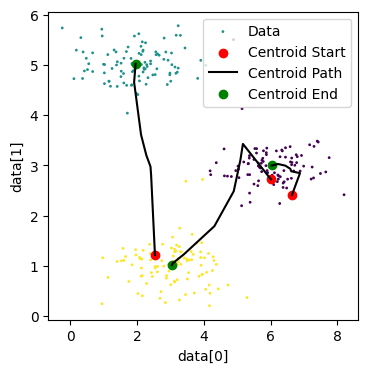

In [24]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(data[:,0], data[:,1], c=assignment, s=1, label='Data')

centroid_start = centroids_log[0]
ax.scatter(centroid_start[:,0], centroid_start[:,1], c='r', label='Centroid Start')

first_centroid = np.array([val[0,:] for val in centroids_log.values()])
ax.plot(first_centroid[:,0], first_centroid[:,1], c='black', label='Centroid Path')

second_centroid = np.array([val[1,:] for val in centroids_log.values()])
ax.plot(second_centroid[:,0], second_centroid[:,1], c='black')

third_centroid = np.array([val[2,:] for val in centroids_log.values()])
ax.plot(third_centroid[:,0], third_centroid[:,1], c='black')

centroid_end = list(centroids_log.values())[-1]
ax.scatter(centroid_end[:,0], centroid_end[:,1], c='g', label='Centroid End')

ax.legend()
ax.set_xlabel('data[0]')
ax.set_ylabel('data[1]')
plt.show()


###  Multiple runs

In [25]:
results = kmeans(data, max_iterations = 10, num_clusters = 3, error_margin = 1)

Results

In [28]:
all_losses = [[key, val[0]] for key, val in results.items()]
print(all_losses)

[[0, 858.1561088853189], [1, 266.97769964171516], [2, 267.3863434404919], [3, 266.65851965491936], [4, 267.04233156327297], [5, 870.7756386708119], [6, 266.65851965491936], [7, 266.82438782478494], [8, 267.11845989068223], [9, 266.65851965491936]]


Visualize two runs bad and good

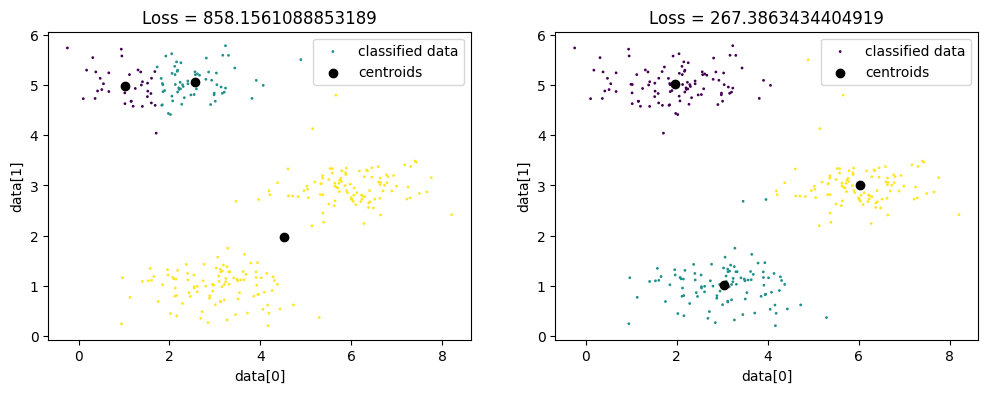

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].scatter(data[:,0], data[:,1], c=results[0][2], s=1)
ax[0].scatter(results[0][1][:,0], results[0][1][:,1], c='black')
ax[0].set_title(f'Loss = {results[0][0]}')
ax[0].set_xlabel('data[0]')
ax[0].set_ylabel('data[1]')
ax[0].legend(['classified data', 'centroids'])

ax[1].scatter(data[:,0], data[:,1], c=results[2][2], s=1)
ax[1].scatter(results[2][1][:,0], results[2][1][:,1], c='black')
ax[1].set_title(f'Loss = {results[2][0]}')
ax[1].set_xlabel('data[0]')
ax[1].set_ylabel('data[1]')
ax[1].legend(['classified data', 'centroids'])

plt.show()
